In [1]:
#S5244511 – Saketha Krishna Pentakota – sakethakrishna.pentakota@griffithuni.edu.au
#s5260801 - Jaishwarya Saravanan - jaishwarya.saravanan@griffithuni.edu.au
#s5260692 - Synthia Haridasan - synthia.haridasan@griffithuni.edu.au


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import re
import missingno as msno

In [2]:
df= pd.read_csv('data.csv')
df.dtypes

C:\Users\jaga4\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [3]:
df.min()
df.max()

C:\Users\jaga4\AppData\Local\Temp/ipykernel_14684/651532374.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()
C:\Users\jaga4\AppData\Local\Temp/ipykernel_14684/651532374.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


Title            🛍MELBOURNE RETAIL MANAGERS🛍 NEW YEAR 🎉 NEW ROL...
Date                                      2019-03-13T00:00:00.000Z
LowestSalary                                                   200
HighestSalary                                                  999
dtype: object

In [4]:
# The different data types are:
# Id                   object
# Title                object
# Company              object
# Date                 object
# Location             object
# Area                 object
# Classification       object
# SubClassification    object
# Requirement          object
# FullDescription      object
# LowestSalary          int64
# HighestSalary         int64
# JobType              object
# dtype: object
# The value range lies between 200-999

In [5]:
df.shape

(318477, 13)

In [6]:
# There are 13 columns and 318477 rows.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
date_range = str(df['Date'].dt.date.min()) + ' to ' +str(df['Date'].dt.date.max())
print(date_range)

2018-10-01 to 2019-03-13


In [8]:
print(df["Date"].unique())

<DatetimeArray>
['2018-10-07 00:00:00+00:00', '2018-10-06 00:00:00+00:00',
 '2018-10-05 00:00:00+00:00', '2018-10-04 00:00:00+00:00',
 '2018-10-03 00:00:00+00:00', '2018-10-02 00:00:00+00:00',
 '2018-10-01 00:00:00+00:00', '2018-10-10 00:00:00+00:00',
 '2018-10-09 00:00:00+00:00', '2018-10-08 00:00:00+00:00',
 ...
 '2019-03-05 00:00:00+00:00', '2019-03-06 00:00:00+00:00',
 '2019-03-04 00:00:00+00:00', '2019-03-03 00:00:00+00:00',
 '2019-03-12 00:00:00+00:00', '2019-03-09 00:00:00+00:00',
 '2019-03-13 00:00:00+00:00', '2019-03-11 00:00:00+00:00',
 '2019-03-10 00:00:00+00:00', '2019-03-08 00:00:00+00:00']
Length: 163, dtype: datetime64[ns, UTC]


In [9]:
#The date period lies between 2018-10-01 to 2019-03-13. There are 163 different dates with job postings.

In [10]:
JobPosting=df['Location'].value_counts()
print(JobPosting)

Sydney                                  60765
Melbourne                               46690
Brisbane                                21466
Perth                                   13198
Adelaide                                 6653
                                        ...  
Yorke Peninsula & Clare Valley             96
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: Location, Length: 65, dtype: int64


In [11]:
# There are 65 locations and sydney has most number of job postings

In [12]:
print(df['Classification'].value_counts())

Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property                  

In [13]:
df['Classification'].unique().shape

(31,)

In [14]:
print(df['Classification'].count())

197229


In [15]:
#There are 31 different job classifications with 197229 job vacancies.

In [16]:
a=df.loc[df['Classification'] == 'Information & Communication Technology']['SubClassification'].value_counts()
print(a)
    

Developers/Programmers                   4211
Business/Systems Analysts                2986
Programme & Project Management           2413
Architects                               1548
Engineering - Software                   1437
Help Desk & IT Support                   1374
Networks & Systems Administration        1194
Consultants                              1149
Other                                     997
Testing & Quality Assurance               831
Security                                  774
Management                                746
Engineering - Network                     552
Database Development & Administration     551
Web Development & Production              452
Sales - Pre & Post                        449
Product Management & Development          376
Telecommunications                        357
Team Leaders                              173
Engineering - Hardware                    116
Technical Writing                          97
Computer Operators                

In [17]:
a.shape

(22,)

In [18]:
#There are 22 sub-sectors in the field of Information & Communication Technology

In [19]:
#Salary range
minSal=df['LowestSalary'].min()
maxSal=df['HighestSalary'].max()
print("The salary ranges between "+str(minSal) +" and " +str(maxSal))


The salary ranges between 0 and 999


In [20]:
#Job classifications and number of job postings with Lowest salary
print(df.loc[df['LowestSalary'] == minSal]['Classification'].value_counts())

Trades & Services                         3889
Information & Communication Technology    3670
Healthcare & Medical                      3171
Hospitality & Tourism                     2821
Manufacturing, Transport & Logistics      2720
Administration & Office Support           2352
Accounting                                1912
Sales                                     1747
Education & Training                      1670
Retail & Consumer Products                1609
Construction                              1465
Government & Defence                      1395
Mining, Resources & Energy                1211
Engineering                               1132
Community Services & Development           973
Call Centre & Customer Service             895
Human Resources & Recruitment              892
Banking & Financial Services               870
Marketing & Communications                 837
Real Estate & Property                     830
Legal                                      720
Design & Arch

In [21]:
#Job classifications and number of job postings with Highest salary
print(df.loc[df['HighestSalary'] == maxSal]['Classification'].value_counts())

Information & Communication Technology    3452
Healthcare & Medical                      1518
Construction                               503
Mining, Resources & Energy                 363
Government & Defence                       318
Engineering                                289
Banking & Financial Services               248
CEO & General Management                   246
Accounting                                 246
Legal                                      238
Sales                                      180
Consulting & Strategy                      129
Manufacturing, Transport & Logistics       109
Real Estate & Property                     108
Education & Training                       105
Human Resources & Recruitment               95
Marketing & Communications                  62
Design & Architecture                       55
Science & Technology                        36
Insurance & Superannuation                  30
Trades & Services                           28
Community Ser

In [22]:
print(df['JobType'].value_counts())

Full Time          201225
Contract/Temp       53906
Casual/Vacation     25355
Part Time           21893
Name: JobType, dtype: int64


In [23]:
#Minimum and Maximum salary for the jobType Full Time
print(df.loc[df['JobType']=="Full Time"]['LowestSalary'].min())
print(df.loc[df['JobType']=="Full Time"]['HighestSalary'].max())

0
999


In [24]:
#Minimum and Maximum salary for the jobType Contract/Temp
print(df.loc[df['JobType']=="Contract/Temp"]['LowestSalary'].min())
print(df.loc[df['JobType']=="Contract/Temp"]['HighestSalary'].max())

0
999


In [25]:
#Minimum and Maximum salary for the jobType Casual/Vacation
print(df.loc[df['JobType']=="Casual/Vacation"]['LowestSalary'].min())
print(df.loc[df['JobType']=="Casual/Vacation"]['HighestSalary'].max())

0
999


In [26]:
#Minimum and Maximum salary for the jobType Part Time
print(df.loc[df['JobType']=="Part Time"]['LowestSalary'].min())
print(df.loc[df['JobType']=="Part Time"]['HighestSalary'].max())

0
999


In [27]:
# 2. Normalize and clean data.

In [28]:
#Average Ssalary for each job
df = df.assign(AverageSalary = (df.LowestSalary + df.HighestSalary) /2 )
df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318472,38564891,Program Manager - Trade Reporting,Talenza,2019-03-13 00:00:00+00:00,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,200,999,NaN,599.5
318473,38564940,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13 00:00:00+00:00,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,200,999,NaN,599.5
318474,38552964,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12 00:00:00+00:00,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,200,999,NaN,599.5
318475,38534438,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08 00:00:00+00:00,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,200,999,NaN,599.5


In [29]:
# The code to remove unnecessary characters from Id column
df['Id'] = df['Id'].astype(str)
df['Id'] = df['Id'].str.extract('(\d{8,})')
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [30]:
# To remove time from date column
df["Date"] = pd.to_datetime(df["Date"]).dt.date
df.dtypes
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [31]:
#Converting Id and Date Column to numeric and datetime types
df['Id']=pd.to_numeric(df['Id'])
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

In [32]:
#The dataframe has 108 duplicate records.  
df[df.duplicated()].shape[0]

108

In [33]:
# We have used drop_duplicates() function to remove the duplicate records from the dataframe.
df=df.drop_duplicates()
df[df.duplicated()].shape[0]

0

In [34]:
# To find Missing values in df columns, we use isnull() function.
missingValues=df.isnull().sum()
missingValues

Id                        0
Title                     0
Company               11997
Date                      0
Location             121248
Area                 195787
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16135
LowestSalary              0
HighestSalary             0
JobType               16058
AverageSalary             0
dtype: int64

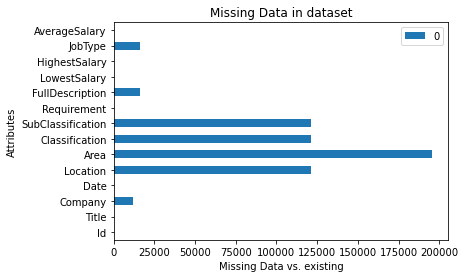

In [35]:
# # To visualize the missing values in df 
# sns.set(rc={'figure.figsize':(11,16)})
# sns.countplot(y=,data=df.isnull().sum())
mval=pd.DataFrame(df.isnull().sum())
mval
#f, ax = plt.subplots(figsize=(10, 6))
# df.isnull().sum().plot(kind='bar')
mval.plot.barh(stacked=True)
plt.title('Missing Data in dataset')
plt.xlabel('Missing Data vs. existing')
plt.ylabel('Attributes')
plt.legend()
# f.autofmt_xdate()
# plt.show()


# sns.set(rc={'figure.figsize':(11,16)})
# sns.countplot(y=mval[0], data=mval[1])

Text(0.5, 1.0, 'Job distribution by average salary')

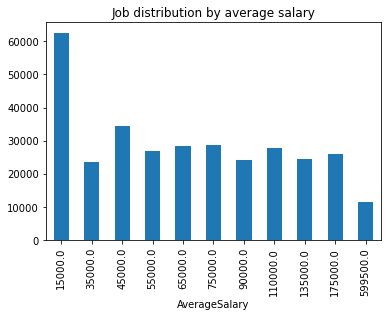

In [36]:
salary_counts = df.groupby(['AverageSalary'])['AverageSalary'].count()
salary_counts.index = salary_counts.index*1000
salary_counts.plot(kind='bar')
plt.title('Job distribution by average salary')


In [37]:
df["AverageSalary"].value_counts()

15.0     62586
45.0     34431
75.0     28706
65.0     28495
110.0    27669
55.0     27018
175.0    25833
135.0    24506
90.0     24249
35.0     23471
599.5    11405
Name: AverageSalary, dtype: int64

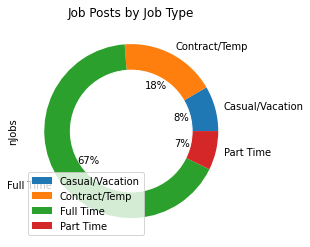

In [38]:
#print(df['JobType'].value_counts())

# def add(x):
#     return(str(x))
jtype=pd.DataFrame(df['JobType'].value_counts().rename_axis('unique_jobType').reset_index(name='nJobs'))
jtype
jtype.groupby(['unique_jobType']).sum().plot(
    kind='pie', y='nJobs', autopct='%1.0f%%')

my_circle = plt.Circle((0, 0), 0.7, color='white')
  
# Give color names
# plt.pie(unique_jobType, labels=nJobs, autopct='%1.1f%%')
  
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Job Posts by Job Type")
plt.show()


# df['donutchart']=df.apply(lambda row : add(row['JobType']), axis = 1)
# plt.pie(df['donutchart'].value_counts()[1:], labels=df['donutchart'].value_counts().index[1:],
#         autopct='%1.1f%%', pctdistance=0.85,explode=[0.02,0.02,0.02,0.02])

# centre_circle = plt.Circle((0, 0), 0.70, fc='white')
# fig = plt.gcf()
  
# # Adding Circle in Pie chart
# fig.gca().add_artist(centre_circle)

# dataframe = pd.DataFrame('JobType': [][])
  
# # Plotting the pie chart for above dataframe
# dataframe.groupby(['Name']).sum().plot(
#     kind='pie', y='votes_of_each_class', autopct='%1.0f%%')


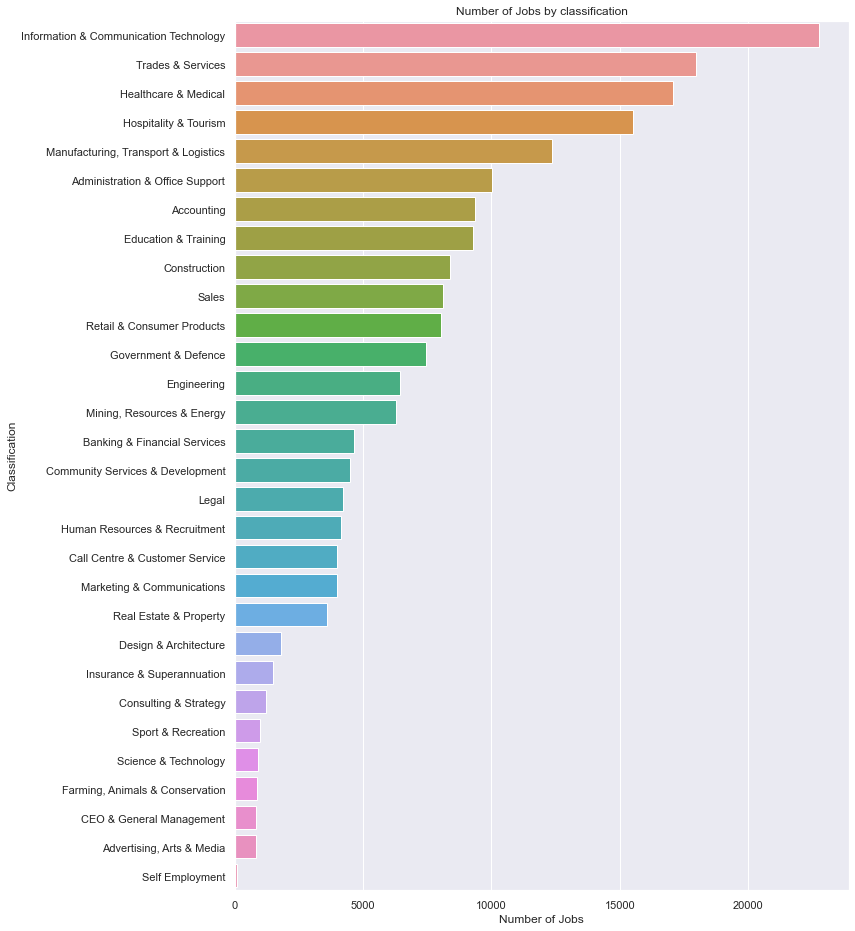

In [39]:
#To Display the list of job sectors and the number of jobs of each type using horizontal bar chart
sns.set(rc={'figure.figsize':(11,16)})
sns.countplot(y="Classification", data=df, order=df["Classification"].value_counts().index)
plt.title('Number of Jobs by classification')
plt.xlabel('Number of Jobs')
plt.show()

<Figure size 3600x3600 with 0 Axes>

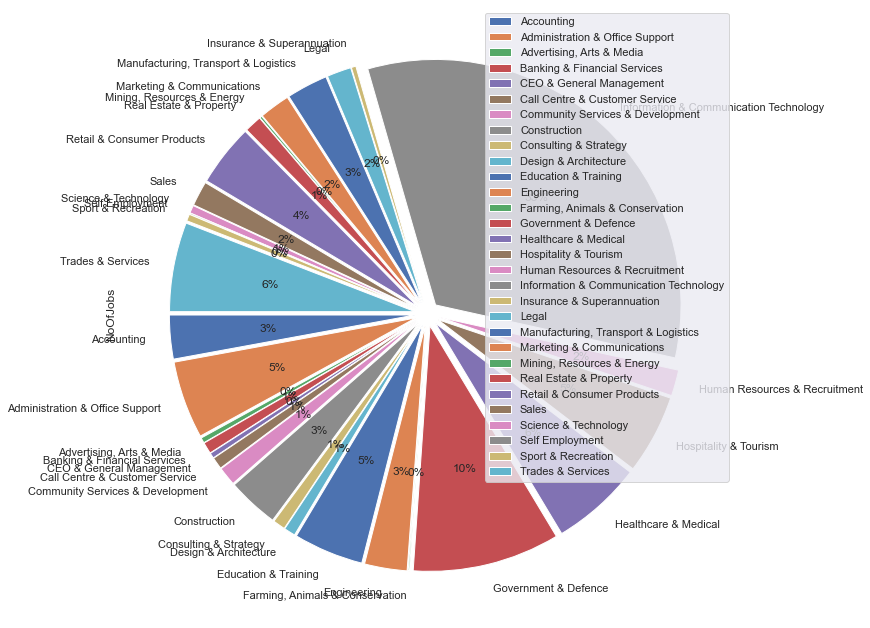

In [40]:
plt.figure(figsize=(50,50))
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
data= pd.DataFrame(df.loc[df['Location'] == "ACT"]['Classification'].value_counts().rename_axis('loc_ACT').reset_index(name='NoOfJobs'))
data.groupby(['loc_ACT']).sum().plot(
    kind='pie', y='NoOfJobs', autopct='%1.0f%%',startangle= 180, explode=explode)
plt.show()
# x=df.loc[df['Location'] == "ACT"]['Classification'].value_counts()
# len(x)
# fig = plt.figure(figsize =(10, 7))
# plt.pie(data, labels=df.loc[df['Location'] == "ACT"]['Classification'].value_counts())
# # show plot
# plt.show()

In [41]:
tst=df['Location'].value_counts()
top30cities=tst.head(30)
top30cities


# plt.figure(figsize=(12,8))
# sns.boxplot(x=tst,y='sal',data=top30cities)
# plt.title("Aggregated values by month")
# plt.show()

Sydney                                  60729
Melbourne                               46656
Brisbane                                21455
Perth                                   13192
Adelaide                                 6650
ACT                                      6249
Newcastle, Maitland & Hunter             3953
Gold Coast                               3587
South West Coast VIC                     1789
Mackay & Coalfields                      1701
Port Hedland, Karratha & Pilbara         1666
Wollongong, Illawarra & South Coast      1657
Sunshine Coast                           1554
Cairns & Far North                       1507
Northern QLD                             1492
Gosford & Central Coast                  1342
Toowoomba & Darling Downs                1310
Darwin                                   1266
Hobart                                   1050
Blue Mountains & Central West             942
Kalgoorlie, Goldfields & Esperance        870
Lismore & Far North Coast         

In [42]:
df[df['Location'].isin(top30cities.index)]

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197223,37828224,Design Manager | Mid Tier Construction | Newca...,Quinton Anthony P/L,2018-11-29,"Newcastle, Maitland & Hunter",NaN,Construction,Project Management,This well known main contractor is in search o...,<p><strong>The Company:</strong><br><br>Our cl...,200,999,Full Time,599.5
197224,37828217,Environmental Officer- Contaminated Land,Evolve Scientific Recruitment,2018-11-29,Melbourne,NaN,Science & Technology,Food Technology & Safety,Environmental Officer- Contaminated Land | 3-4...,<strong>About the company</strong><br><br>This...,200,999,Full Time,599.5
197225,37828093,Construction Manager Required - Commercial & A...,Constructive Recruitment Pty Ltd,2018-11-29,Melbourne,CBD & Inner Suburbs,Construction,Project Management,Career defining role with buoyant commercial/a...,<ul>\n <li>Growing &amp; financially ...,200,999,Full Time,599.5
197226,37828001,ENT Surgeon,Healthcare Professionals Group,2018-11-29,"Newcastle, Maitland & Hunter",NaN,Healthcare & Medical,Medical Specialists,Responsible for providing surgical procedures ...,"<div id=""FlashContent"" class=""videoembed""><ifr...",200,999,Full Time,599.5


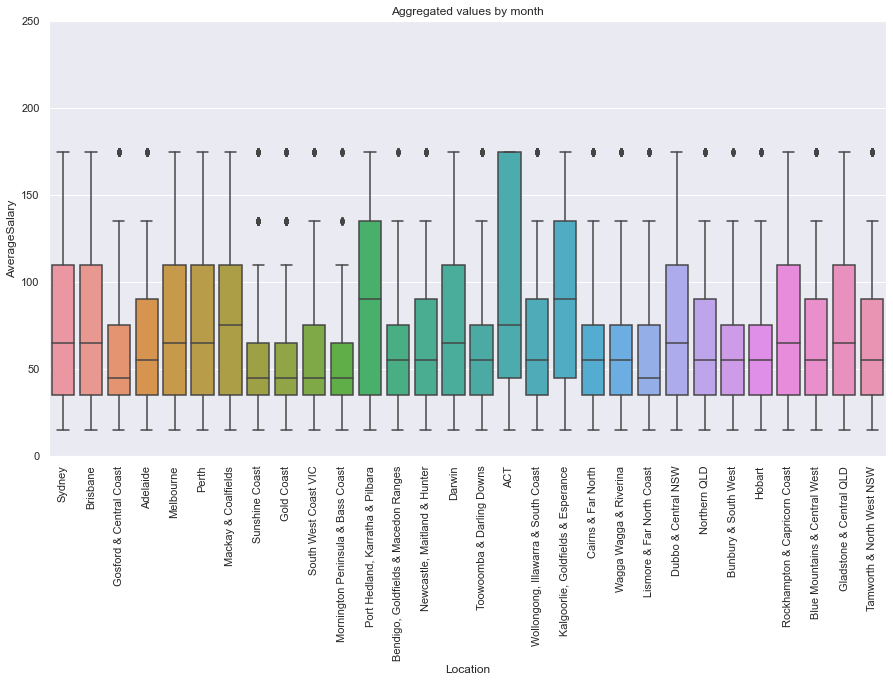

In [43]:
top30 = df[df['Location'].isin(top30cities.index)]
top30
plt.figure(figsize=(15,8))

sns.boxplot(x='Location',y='AverageSalary',data=top30)

plt.xticks(rotation=90)
plt.ylim(0,250)
plt.title("Aggregated values by month")
plt.show()


In [44]:
data1= pd.DataFrame(df.loc[df['Location'] == "ACT"]['JobType'].value_counts().rename_axis('loc').reset_index(name='NoOfJob'))
data1
data2= pd.DataFrame(df.loc[df['Location'] == "Sydney"]['JobType'].value_counts().rename_axis('loc').reset_index(name='NoOfJobS'))
data2
pd.concat( [data1, data2], axis=1)

# We can infer that total number of jobs in location Sydney is more than ACT. Full time jobs in Sydney is 40586 whereas in ACT it's 3036 which is not even 10%.The number of Contract/Temp jobs in Sydney is 10989 which is more than 80% when compared to no.of Contract/Temp jobs in ACT. Casual/Vacation jobs in Sydney is 3017 whereas in ACT it's 350 which is just 11%. Part time jobs in Sydney is 2849 whereas in ACT it's 254 which is just 9%. 

,loc,NoOfJob,loc,NoOfJobS
0,Full Time,3036,Full Time,40586
1,Contract/Temp,2166,Contract/Temp,10989
2,Casual/Vacation,350,Casual/Vacation,3017
3,Part Time,254,Part Time,2849


In [45]:
jobSecACT= pd.DataFrame(df.loc[df['Location'] == "ACT"]['Classification'].value_counts().rename_axis('JobSecACT').reset_index(name='nojobACT'))
jobSecACT=jobSecACT.head(5)
jobSecSYD= pd.DataFrame(df.loc[df['Location'] == "Sydney"]['Classification'].value_counts().rename_axis('JobSecSYD').reset_index(name='nojobSYD'))
jobSecSYD=jobSecSYD.head(5)
pd.concat( [jobSecACT, jobSecSYD], axis=1)

,JobSecACT,nojobACT,JobSecSYD,nojobSYD
0,Information & Communication Technology,2057,Information & Communication Technology,9543
1,Government & Defence,606,Hospitality & Tourism,4071
2,Healthcare & Medical,375,Trades & Services,4023
3,Trades & Services,367,Accounting,4008
4,Hospitality & Tourism,326,Healthcare & Medical,3335


Text(0.5, 1.0, 'Top 5 Jobs ACT')

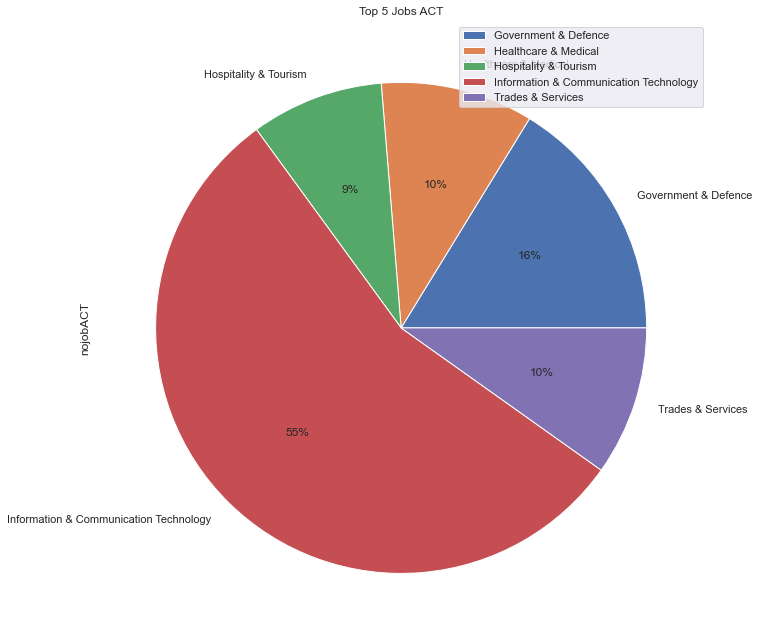

In [46]:
jobSecACT.groupby(['JobSecACT']).sum().plot(
    kind='pie', y='nojobACT', autopct='%1.0f%%')
plt.title('Top 5 Jobs ACT')

Text(0.5, 1.0, 'Top 5 Jobs Sydney')

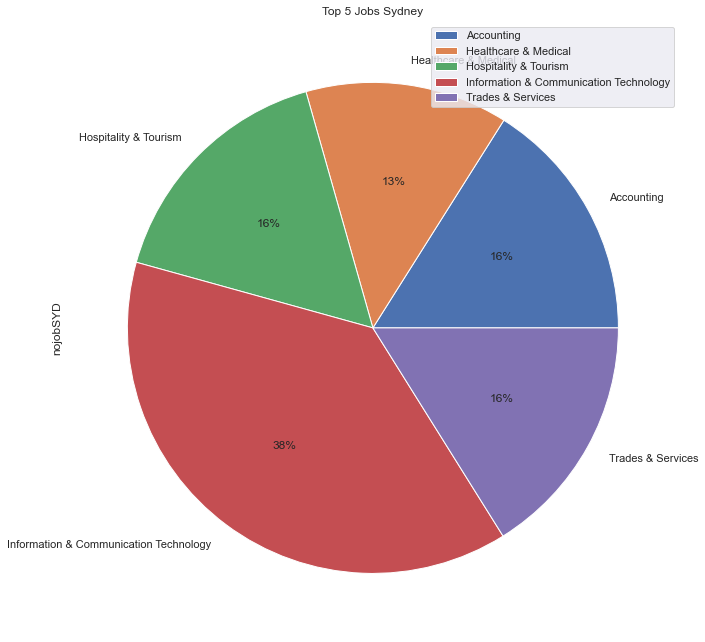

In [47]:
jobSecSYD.groupby(['JobSecSYD']).sum().plot(
    kind='pie', y='nojobSYD', autopct='%1.0f%%')
plt.title('Top 5 Jobs Sydney')

In [48]:
salRangeACT= df.loc[df['Location'] == "ACT"]['AverageSalary'].value_counts().rename_axis('AverageSal').reset_index(name='noofjobACT')
salRangeSYD= df.loc[df['Location'] == "Sydney"]['AverageSalary'].value_counts().rename_axis('AverageSal').reset_index(name='noofjobSYD')
#pd.concat( [salRangeACT, salRangeSYD], axis=1)

pd.merge(salRangeACT, salRangeSYD, on='AverageSal', how='outer')

,AverageSal,noofjobACT,noofjobSYD
0,15.0,1070,11740
1,175.0,976,6270
2,599.5,711,3190
3,110.0,537,5578
4,135.0,509,5703
5,75.0,502,5029
6,45.0,453,5369
7,35.0,406,3967
8,90.0,391,3738
9,65.0,379,5286


In [49]:
top5CompaniesACT= pd.DataFrame(df.loc[df['Location'] == "ACT"]['Company'].value_counts())
top5CompaniesACT
top5CompACT=top5CompaniesACT[:5]
top5CompACT

top5 = df[df['Company'].isin(top5CompACT.index)]
print(top5.groupby('Classification')['Company'].value_counts())

Classification        Company                                                                         
Accounting            Hudson                                                                              126
                      Chandler Macleod Group                                                               32
                      Talent – Winner ‘Seek Large Recruitment Agency of the Year’ 3 consecutive years!      8
                      Paxus                                                                                 4
                      Modis                                                                                 2
                                                                                                         ... 
Science & Technology  Modis                                                                                 1
                      Talent – Winner ‘Seek Large Recruitment Agency of the Year’ 3 consecutive years!      1
Sport & Recreatio

In [50]:
top5CompaniesSYD= pd.DataFrame(df.loc[df['Location'] == "Sydney"]['Company'].value_counts())
top5CompaniesSYD
top5CompSYD=top5CompaniesSYD[:5]
top5CompSYD

top5S = df[df['Company'].isin(top5CompSYD.index)]
print(top5S.groupby('Classification')['Company'].value_counts())

Classification                   Company                      
Accounting                       Robert Walters                   168
                                 Bluefin Resources Pty Limited     27
                                 Design & Build                     4
                                 Paxus                              4
Administration & Office Support  Robert Walters                    69
                                                                 ... 
Sales                            Design & Build                     2
Science & Technology             Bluefin Resources Pty Limited     21
Sport & Recreation               Bluefin Resources Pty Limited      1
Trades & Services                Jora Local                        88
                                 Design & Build                    53
Name: Company, Length: 68, dtype: int64


In [51]:
#we can see that the job opportunity in all job sectors is more in sydney compared to ACT. Hence Sydney is highly recommended for the professionals to secure job easily.

In [52]:
month=df['Date'].apply(lambda x: x.strftime('%b')) 
month

0         Oct
1         Oct
2         Oct
3         Oct
4         Oct
         ... 
318472    Mar
318473    Mar
318474    Mar
318475    Mar
318476    Mar
Name: Date, Length: 318369, dtype: object

In [53]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [54]:
df["month"] = df["Date"].dt.month


C:\Users\jaga4\AppData\Local\Temp/ipykernel_14684/2069029842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df["Date"].dt.month


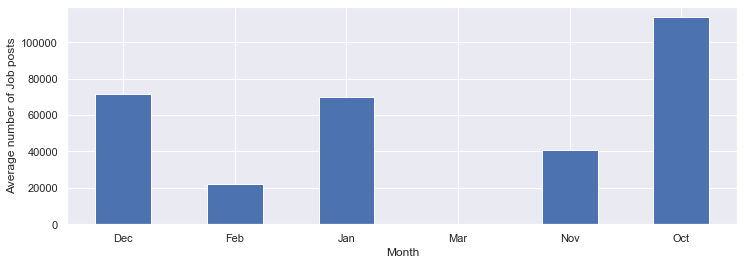

In [55]:
fig, axs = plt.subplots(figsize=(12, 4))

df.groupby(df['Date'].apply(lambda x: x.strftime('%b'))) ['Date'].count().plot(
    kind='bar', rot=0, ax=axs
)



plt.xlabel("Month");  # custom x label using matplotlib

plt.ylabel("Average number of Job posts");

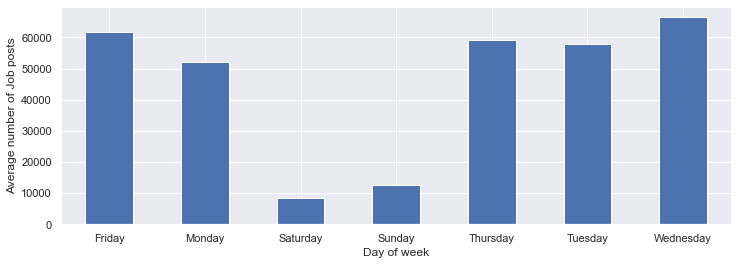

In [56]:


fig, axs = plt.subplots(figsize=(12, 4))

df.groupby(df['Date'].apply(lambda x: x.day_name())) ['Date'].count().plot(
    kind='bar', rot=0, ax=axs
)


plt.xlabel("Day of week");  # custom x label using matplotlib

plt.ylabel("Average number of Job posts");

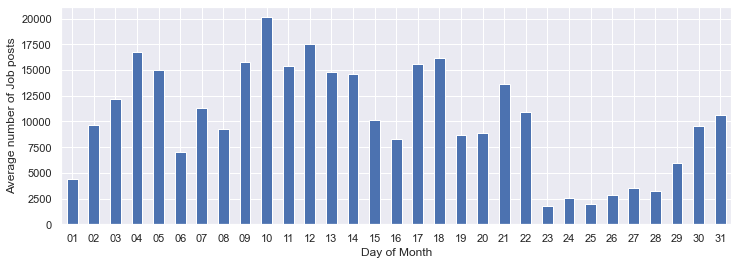

In [57]:
fig, axs = plt.subplots(figsize=(12, 4))

df.groupby(df['Date'].apply(lambda x: x.strftime('%d'))) ['Date'].count().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Day of Month");  # custom x label using matplotlib

plt.ylabel("Average number of Job posts");

C:\Users\jaga4\AppData\Local\Temp/ipykernel_14684/1132143367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5c["Date"] = pd.to_datetime(top5c["Date"]).dt.date


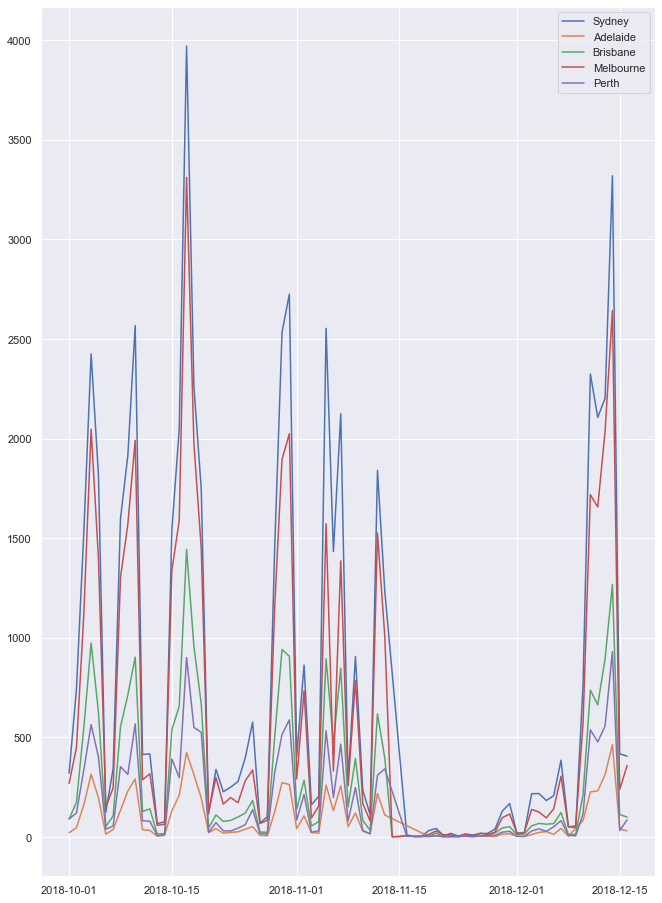

In [58]:
top5city=top30cities[:5]
top5c = df[df['Location'].isin(top5city.index)]
top5c["Date"] = pd.to_datetime(top5c["Date"]).dt.date
counts = top5c.groupby([top5c['Date'],'Location'])["Id"].count()
plt.plot(counts.loc[:, "Sydney"], label="Sydney")
plt.plot(counts.loc[:, "Adelaide"], label="Adelaide")
plt.plot(counts.loc[:, "Brisbane"], label="Brisbane")
plt.plot(counts.loc[:, "Melbourne"], label="Melbourne")
plt.plot(counts.loc[:, "Perth"], label="Perth")
plt.legend()
plt.show()

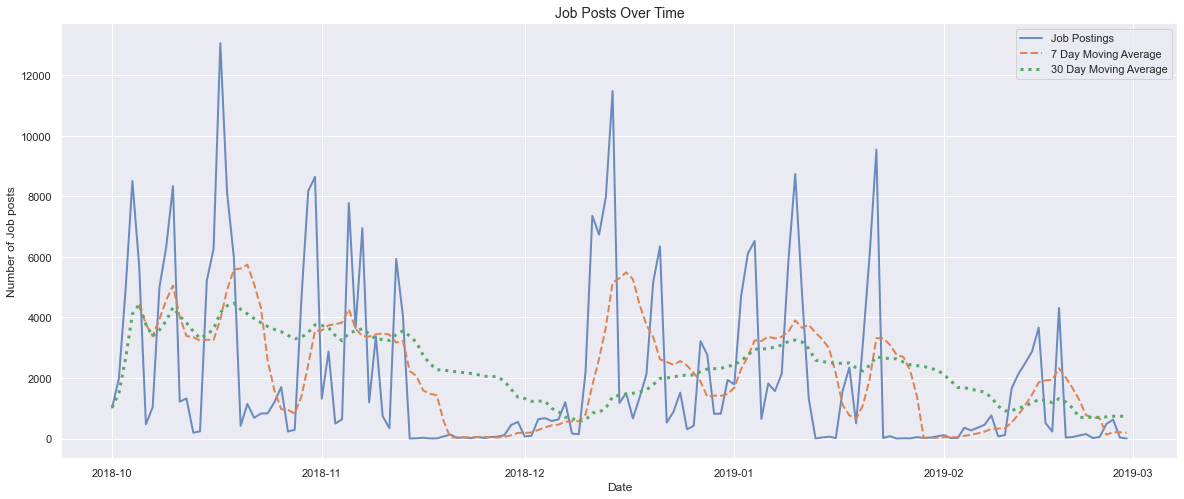

In [59]:
df_wd = df.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_wd.set_index('Date',inplace=True)

#exclude March because the dataset stops halfway through the month
df_wd = df_wd[:151]

# Get the count of jobs over time
df_wd = df_wd['Title'].rename('Count')

# Generate moving average over a weekly interval
moving_average_week = df_wd.rolling(7, min_periods=5)
moving_average_month = df_wd.rolling(30, min_periods=0)
plot_df = pd.DataFrame({'Count': df_wd, '7 Day Moving Average': moving_average_week.mean(), '30 Day Moving Average': moving_average_month.mean()})

plt.figure(figsize=(20,8))
plt.plot(plot_df['Count'],alpha=0.8, lw=2)
plt.plot(plot_df['7 Day Moving Average'],linestyle='--', lw=2)
plt.plot(plot_df['30 Day Moving Average'],linestyle='dotted', lw=3)
plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'], frameon=True)
plt.title('Job Posts Over Time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job posts')
plt.show()




#wd = pd.DataFrame(df.groupby(df['Date']) ['Date'].count().rename_axis('Day').reset_index(name='val'))
#wd
#mon = pd.DataFrame(df.groupby(df['Date'])['Date'].count().rename_axis('d').reset_index(name='qval'))
#mon

#wd['SPmoving_avg_7'] = wd['val'].rolling(7).mean() 
#mon['SPmoving_avg_30'] = mon['qval'].rolling(30).mean() 
#print(mon)

# df.Date.plot()
#wd.SPmoving_avg_7.plot(label='7 period moving average')
#mon.SPmoving_avg_30.plot(label='30 period moving average')
#plt.legend()

In [69]:
from nbconvert import HTMLExporter
import codecs
import nbformat

notebook_name = 'MainAssignment.ipynb'
output_file_name = 'keywordsICT.html'

exporter = HTMLExporter()
output_notebook = nbformat.read(notebook_name, as_version=4)

output, resources = exporter.from_notebook_node(output_notebook)
codecs.open(output_file_name, 'w', encoding='utf-8').write(output)

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


subICT= pd.DataFrame(df.loc[df['Classification'] == "Information & Communication Technology"]['SubClassification'])
subICT


# subICT['Keywords'] = subICT.SubClassification.apply(lambda x: nltk.word_tokenize(x))
# stops =  list(stopwords.words('english'))
# subICT['Keywords'] = subICT['Keywords'].apply(lambda x: [item for item in x if item.lower() not in stops])
# subICT['Keywords'] = subICT['Keywords'].apply(', '.join)

# print(subICT)

# Y = subICT['SubClassification'].apply(lambda x: tfidf.fit_transform([x]))
# Y
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from wordcloud import WordCloud, STOPWORDS


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import wordcloud


# Tokenize
subICT['tokens'] = subICT.apply(lambda row: nltk.word_tokenize(row['SubClassification']), axis=1)
# Remove punctuation
subICT['alpha'] = subICT['tokens'].apply(lambda x: [item for item in x if item.isalpha()])
# Remove stop words
stop_words = stopwords.words('english')
subICT['stop'] = subICT['alpha'].apply(lambda x: [item for item in x if item not in stop_words])
# Stem
stemmer = PorterStemmer()
subICT['stemmed'] = subICT['stop'].apply(lambda x: [stemmer.stem(item) for item in x])
subICT['stemmed']
# # count of unique values 
# print(subICT['stemmed'].nunique())

word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
word_cloud.generate_from_frequencies(subICT['stemmed'])

plt.figure(figsize=(16,16))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title('TF-IDF Analysis of Requirements', size=14)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'